In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Data yang digunakan

In [2]:
# Membaca data
df = pd.read_csv('populationbycountry.csv')
indonesia = df.loc[df['Nation'] == 'Indonesia']
indonesia

,Nation,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
201,Indonesia,151.0244,154.13906,157.27963,160.44071,163.61264,166.77028,169.89552,173.01546,176.16566,...,217.83628,220.97191,223.06967,226.00413,228.89575,231.82024,234.694,237.51236,240.27152,242.96834


In [3]:
# Mengambil data populasi untuk negara Indonesia
population = df[df['Nation'] == 'Indonesia'].iloc[:, 1:].values.flatten()

# Mengubah isi data menjadi bentuk float
population = population.astype(float)

In [4]:
# Membuat X dan y untuk digunakan dalam Regresi Linear
X = np.arange(1980, 2011).reshape(-1, 1)
y = population.reshape(-1, 1)

In [5]:
# Data X
X

array([[1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]])

In [6]:
# Data y
y

array([[151.0244 ],
       [154.13906],
       [157.27963],
       [160.44071],
       [163.61264],
       [166.77028],
       [169.89552],
       [173.01546],
       [176.16566],
       [179.33997],
       [182.51628],
       [185.70794],
       [188.90468],
       [192.09324],
       [195.3278 ],
       [198.63437],
       [202.01216],
       [205.27672],
       [208.47748],
       [211.6872 ],
       [214.67661],
       [217.83628],
       [220.97191],
       [223.06967],
       [226.00413],
       [228.89575],
       [231.82024],
       [234.694  ],
       [237.51236],
       [240.27152],
       [242.96834]])

### Model Machine Learning

In [7]:
# Model Regresi Linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
# Kenaikan penduduk tiap tahun
model.coef_

array([[3.10368468]])

Population in 2011: 247.96 million
Population in 2012: 251.08 million
Population in 2013: 254.19 million
Population in 2014: 257.31 million
Population in 2015: 260.42 million
Population in 2016: 263.54 million
Population in 2017: 266.65 million
Population in 2018: 269.76 million
Population in 2019: 272.88 million
Population in 2020: 275.99 million
Population in 2021: 279.11 million
Population in 2022: 282.22 million
Population in 2023: 285.34 million
Population in 2024: 288.45 million
Population in 2025: 291.56 million
Population in 2026: 294.68 million
Population in 2027: 297.79 million
Population in 2028: 300.91 million
Population in 2029: 304.02 million
Population in 2030: 307.14 million
Population in 2031: 310.25 million
Population in 2032: 313.36 million
Population in 2033: 316.48 million
Population in 2034: 319.59 million
Population in 2035: 322.71 million


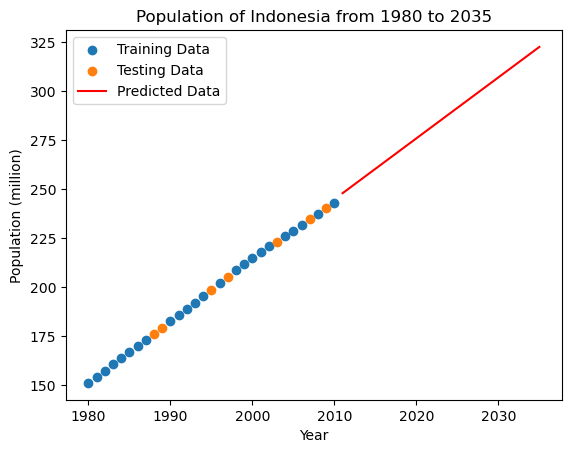

Model score: 0.9989959088454314


In [9]:
# Data di bagi menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data di fit untuk melakukan prediksi dengan Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi populasi
y_pred = model.predict(X_test)

# Prediks populasi tahun 2011 sampai 2035
X_pred = np.arange(2011, 2036).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Print jumlah populasi yang di prediksikan
for year, pop in zip(X_pred.flatten(), y_pred.flatten()): # zip untuk menggabungkan dua array
    print(f"Population in {year}: {pop:.2f} million")     # menjadi satu

# Plot SCatter
plt.scatter(X_train.flatten(), y_train.flatten(), label='Training Data')
plt.scatter(X_test.flatten(), y_test.flatten(), label='Testing Data')

# Plot data yang di prediksi
plt.plot(X_pred.flatten(), y_pred.flatten(), label='Predicted Data', color='red')


plt.xlabel("Year")
plt.ylabel("Population (million)")
plt.title("Population of Indonesia from 1980 to 2035")
plt.legend()
plt.show()

# Print keakuratan model Machine Learning
print("Model score:", model.score(X_test, y_test))

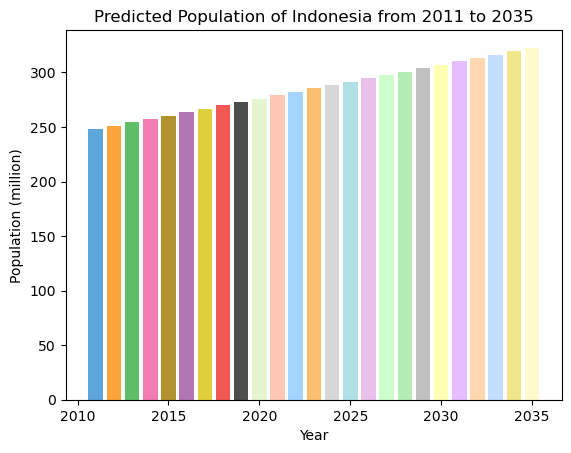

In [10]:
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F', '#B276B2', '#DECF3F', '#F15854', '#4D4D4D', '#E6F5D0',
          '#FFC8B4', '#A4D4FF', '#FDBF6F', '#D7D7D7', '#B0E0E6', '#E7C0EC', '#CCFFCC', '#B4EEB4', '#C0C0C0', '#FFFFB3',
          '#E6BEFF', '#FFD8B1', '#C2DFFF', '#F0E68C', '#FFFACD']

plt.bar(X_pred.flatten(), y_pred.flatten(), color=colors)

plt.xlabel("Year")
plt.ylabel("Population (million)")
plt.title("Predicted Population of Indonesia from 2011 to 2035")
plt.show()